<h1 align="center">AtliQo Bank Credit Card Launch: Phase 1</h1>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sqlalchemy import create_engine


<h2 align="center"> Import data from Input files <h2>

In [3]:
df_customer = pd.read_csv(r"D:\Ashish\Data Science\AtliQo-Bank-Credit-Card-Launch\Input\customers.csv")
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [4]:
df_transaction = pd.read_csv(r"D:\Ashish\Data Science\AtliQo-Bank-Credit-Card-Launch\Input\transactions.csv")
df_transaction.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [6]:
df_credit_profile = pd.read_csv(r"D:\Ashish\Data Science\AtliQo-Bank-Credit-Card-Launch\Input\credit_profiles.csv")
df_credit_profile.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [8]:
print("Customer DF shape:", df_customer.shape)
print("Transaction DF shape:", df_transaction.shape)
print("Credit Profile DF shape:", df_credit_profile.shape)

Customer DF shape: (1000, 8)
Transaction DF shape: (500000, 7)
Credit Profile DF shape: (1004, 6)


<h2 align="Center"> Data Cleaning: Handle NULL values </h2>

In [9]:
df_customer.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [13]:
df_customer.loc[df_customer['annual_income'].isnull()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [15]:
mean_annual_income = df_customer['annual_income'].mean()
median_annual_income = df_customer['annual_income'].median()

print("Mean Annual Income:", mean_annual_income)
print("Median Annual Income:", median_annual_income)

Mean Annual Income: 139410.31473684212
Median Annual Income: 112218.5


<h3>We can replace the 0 values with the Mean or Median, but since there are different occupations, we need to calculate and apply the Mean/Median separately for each occupation.</h3>

In [17]:
occupation_wise_median = df_customer.groupby('occupation')['annual_income'].median()
occupation_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

<h3>Use a Lambda Function with apply to Call get_median_value</h3>

In [18]:
df_customer['annual_income'] = df_customer.apply(lambda row: occupation_wise_median[row['occupation']] if pd.isnull(row['annual_income'])
                                                 else row['annual_income'], axis=1)

In [19]:
df_customer.loc[df_customer['annual_income'].isnull()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [20]:
print("Annual income updated successfully.")
# print(df_customer.iloc[14]['annual_income'], df_customer.iloc[82]['annual_income'])
print(df_customer.iloc[[14, 82]]['annual_income'])

Annual income updated successfully.
14    45794.0
82    46759.0
Name: annual_income, dtype: float64


In [21]:
df_customer.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


<h3> Plot a Histogram of Annual Income </h3>

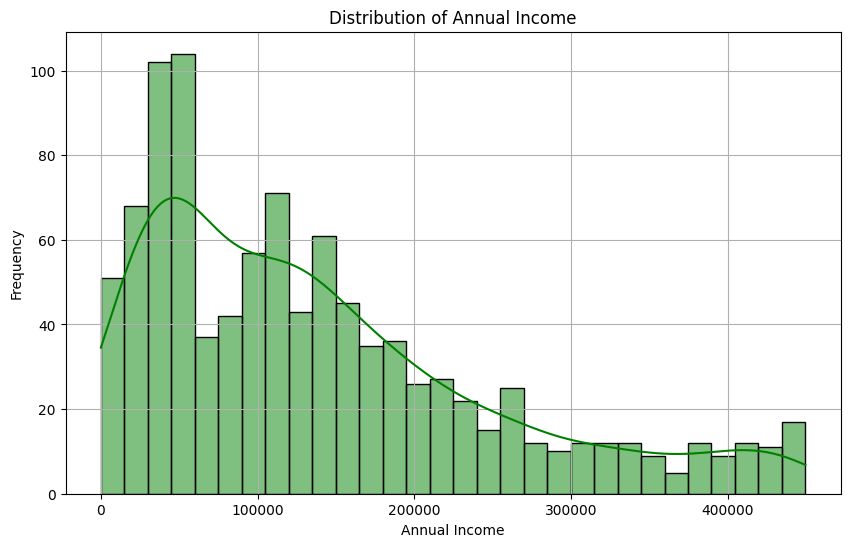

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_customer['annual_income'], bins=30, kde=True, color='green', label='Annual Income')

plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<h2 align="Center"> The annual income shows a right-skewed distribution. </h2>

<h2 align=Center> Exercise: Treat Outliers in Age Column </h2>

<h3> Age is valid only if it is between 15 and 80 years. </h3>

In [32]:
df_customer.loc[(df_customer['age'] < 15) | (df_customer['age'] > 85)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [33]:
occupation_wise_age = df_customer.groupby('occupation')['age'].median()
occupation_wise_age

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [34]:
df_customer['age'] = df_customer.apply(lambda row: occupation_wise_age[row['occupation']] 
                                       if (row['age'] < 15) | (row['age'] > 85) 
                                       else row['age'], axis=1)

In [35]:
df_customer.loc[(df_customer['age'] < 15) | (df_customer['age'] > 85)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [38]:
print(df_customer.iloc[[0, 41]][['occupation','age']])

        occupation   age
0   Business Owner  51.0
41          Artist  26.0
